In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
data = load_iris().data[:, :2]
nrows, ncols = data.shape

print(nrows, ncols)

150 2


In [3]:
class Kmeans:
    
    def __init__(self, data, k):
        self.k = k
        self.data = data
        
    def initialize_centers(self):
        nrows, ncols = self.data.shape
        centers_idx = [np.random.choice(range(nrows))]        
        
        for j in range(self.k - 1):
            max_dist = 0
            max_index = 0
            
            for i in range(nrows):
                distances = np.linalg.norm(self.data[[i], :] - self.data[centers_idx, :], axis=1)
                min_dist = np.min(distances)
                if min_dist > max_dist:
                    max_dist = min_dist
                    max_index = i
            
            centers_idx.append(max_index)
        
        centers = self.data[centers_idx, :]
        return centers
        
    def update_centers(self, centers, clusters):
        nrows, ncols = self.data.shape
        for i in range(self.k):
            idx = clusters == i
            centers[i, :] = np.mean(self.data[idx, :], axis=0)
        
        return centers
    
    
    def assign_clusters(self, centers, clusters):
        nrows, ncols = self.data.shape
        for i in range(nrows):
            distances = np.linalg.norm(self.data[[i], :] - centers, axis=1)
            clusters[i] = np.argmin(distances)
        return clusters
    
    
    def run(self, max_iters=500):    
        nrows, ncols = self.data.shape
        centers = self.initialize_centers()
        clusters = np.zeros((nrows, ))
        
        for i in range(max_iters):
            clusters = self.assign_clusters(centers, clusters)
            centers = self.update_centers(centers, clusters)
            
        return centers, clusters
    
    def plot(self, centers, clusters):
        
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(1, 1, 1)
        
        for i in range(self.k):
            idx = clusters == i
            cluster_data = self.data[idx, :]
            ax.scatter(cluster_data[:, 0], cluster_data[:, 1])
        
        plt.show()
        
    
    

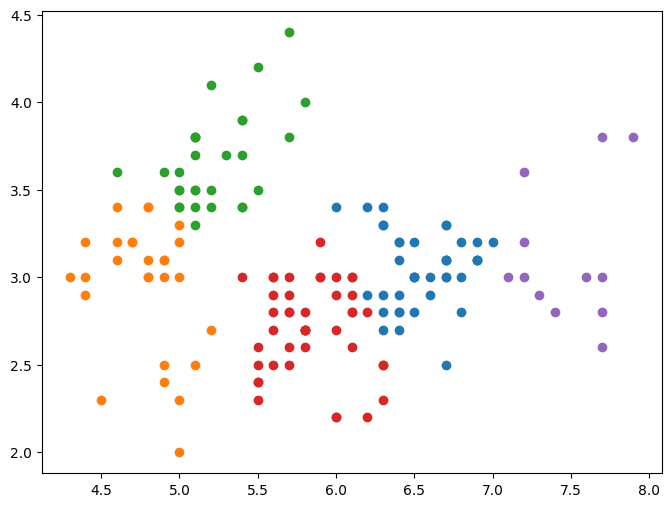

In [5]:
kmeans = Kmeans(data, 5)
centers, clusters = kmeans.run()
kmeans.plot(centers, clusters)